[*********************100%***********************]  1 of 1 completed


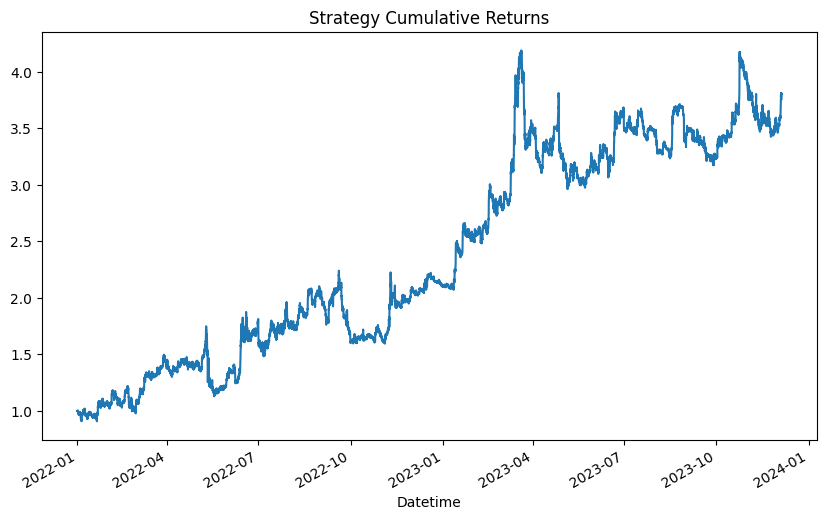

In [23]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download historical data
data = yf.download('BTC-USD', start="2022-01-01", interval='1h')

# Define Moving Average function based on type
def calculate_ma(ma_type, series, length):
    if ma_type == "SMA":
        return series.rolling(window=length).mean()
    elif ma_type == "EMA":
        return series.ewm(span=length, adjust=False).mean()
    # Add other MA types as needed
    else:
        return series.rolling(window=length).mean()  # Default to SMA

# Set MA parameters
ma_type = "SMA"  # Example: EMA
ma_length = 21

# Calculate MAs for open and close
data['open_ma'] = calculate_ma(ma_type, data['Open'], ma_length)
data['close_ma'] = calculate_ma(ma_type, data['Close'], ma_length)

# Generate signals
data['long_signal'] = np.where(data['close_ma'] > data['open_ma'], 1, 0)
data['short_signal'] = np.where(data['open_ma'] > data['close_ma'], -1, 0)
data['signal'] = data['long_signal'] + data['short_signal']

# Calculate returns
data['returns'] = data['Close'].pct_change()
data['strategy_returns'] = data['returns'] * data['signal'].shift()

# Cumulative returns
data['cumulative_returns'] = (data['strategy_returns'] + 1).cumprod()

# Plot the equity curve
plt.figure(figsize=(10, 6))
data['cumulative_returns'].plot()
plt.title('Strategy Cumulative Returns')
plt.show()